# Modeling with Principal Component Analysis

We use Gradient Boosting Model to demonstrate

In [1]:
import pandas as pd
df = pd.read_csv('titanic.csv')
# Assign input variables
X = df.loc[:,['Pclass','Sex','Age','Fare','Embarked','SibSp','Parch']]

# Assign target variable
y = df['Survived']

# Replace missing values by the median
X["Age"] = X["Age"].fillna(X["Age"].median())

# Impute the Embarked variable
X["Embarked"] = X["Embarked"].fillna("S")

# Change Pclass to categorical variable
X['Pclass'] = X['Pclass'].astype(object)

# Encode categorical variable
X = pd.get_dummies(X)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

#### Without PCA

Testing Accuracy:  0.8208955223880597


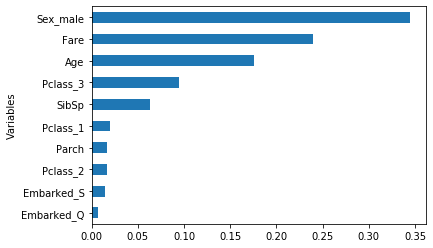

In [2]:
from sklearn.ensemble import GradientBoostingClassifier
r1 = GradientBoostingClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print("Testing Accuracy: ", r1.score(x_test, y_test))


import warnings
warnings.filterwarnings('ignore')

sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Variables':x_train.columns[sorted_idx], 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Variables', legend=False)


#### With PCA

In [3]:
n_components = 6

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
from sklearn.decomposition import PCA

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(x_train)
# Apply transform to both the training set and the test set.
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

pca = PCA(n_components = n_components)

pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

print('Variance Explain: ',pca.explained_variance_ratio_.sum())

Variance Explain:  0.8645324898248484


In [4]:
from sklearn.ensemble import AdaBoostClassifier
r1 = AdaBoostClassifier(n_estimators=100, learning_rate=1)
r1.fit(x_train, y_train)
# Accuracry on test data
print("Testing Accuracy: ", r1.score(x_test, y_test))

Testing Accuracy:  0.7947761194029851


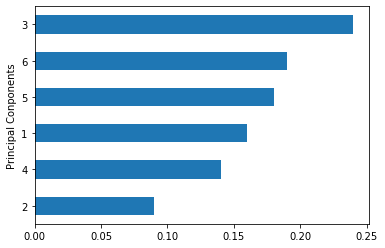

In [5]:
sorted_idx = (-r1.feature_importances_).argsort()

feature_importance = pd.DataFrame({'Principal Conponents':sorted_idx+1, 'Importance':r1.feature_importances_[sorted_idx]})
df = feature_importance[:10]
df.sort_values('Importance',inplace=True)

df.plot(kind='barh',y='Importance',x='Principal Conponents', legend=False)

### Practice

Do the follows and show your work in class to the instructor for credit. 

1. In Python, apply PCA with Gradient Boosting on the Breast Cancer data.  In the PCA use 5 principal components to extract the original data. Compare the accuracy of the Gradient Boosting with and without PCA. Plot the importances ranking of the PCA in the gradient model. 

2. In Python, apply PCA with Gradient Boosting on the Breast Cancer data.  In the PCA, use at least 80% of the variance in the original data. Compare the accuracy of the Gradient Boosting with and without PCA. Plot the importances ranking of the PCA in the gradient model. 

